In [2]:
## What is the effect of increasing state temperatures on wildfire severity and frequency?

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime

In [2]:
# Import data
jan_avg_temp = pd.read_csv('Resources/1990-2020_Jan_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
feb_avg_temp = pd.read_csv('Resources/1990-2020_Feb_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
mar_avg_temp = pd.read_csv('Resources/1990-2020_Mar_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
apr_avg_temp = pd.read_csv('Resources/1990-2020_Apr_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
may_avg_temp = pd.read_csv('Resources/1990-2020_May_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jun_avg_temp = pd.read_csv('Resources/1990-2020_Jun_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jul_avg_temp = pd.read_csv('Resources/1990-2020_Jul_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
aug_avg_temp = pd.read_csv('Resources/1990-2020_Aug_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
sep_avg_temp = pd.read_csv('Resources/1990-2020_Sep_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
oct_avg_temp = pd.read_csv('Resources/1990-2020_Oct_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
nov_avg_temp = pd.read_csv('Resources/1990-2020_Nov_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
dec_avg_temp = pd.read_csv('Resources/1990-2020_Dec_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')


In [3]:
# jan_avg_temp.columns = ['Date', 'Average Temperature', 'NA']
# jan_avg_temp.drop('NA', 1).head()

In [4]:
# Remove anomaly column
# List of dataframes
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in months_dfs:
    df.columns = ['Date', 'Average Temperature', 'NA']
    df['Avg Temp (F)'] = df['Average Temperature']
    df.drop('Average Temperature', 1, inplace= True)
    del df['NA']

In [5]:
# # Split up date into year and month columns
# jan_avg_temp['fake_year'] = pd.to_datetime(jan_avg_temp['Date'],format='%Y%m')
# jan_avg_temp['year'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).year
# jan_avg_temp['month'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).month
# jan_avg_temp.drop('fake_year', 1).head()

In [6]:
jan_avg_temp.head()

,Date,Avg Temp (F)
0,199001,43.1
1,199101,43.6
2,199201,43.2
3,199301,41.3
4,199401,45.7


In [7]:
# Create a loop to get year and month from all dataframes 
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

for df in months_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [8]:
# Set year as index
for df in months_dfs:
    df.set_index('Year', 1, inplace = True)

In [9]:
# Merge data from Jan-Dec on Month (or year), how = left
t1 = pd.merge(jan_avg_temp, feb_avg_temp, on= 'Year', how= 'left', suffixes=('_Jan', '_Feb'))
t2 = pd.merge(t1, mar_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
t4 = pd.merge(t3, may_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t5 = pd.merge(t4, jun_avg_temp,  on= 'Year', how= 'left', suffixes=('_May', '_Jun'))
t5.drop(['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_Jun'], 1, inplace = True)
t6 = pd.merge(t5, jul_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t7 = pd.merge(t6, aug_avg_temp,  on= 'Year', how= 'left', suffixes=('_Jul', '_Aug'))
t8 = pd.merge(t7, sep_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t9 = pd.merge(t8, oct_avg_temp,  on= 'Year', how= 'left', suffixes=('_Sep', '_Oct'))
t10 = pd.merge(t9, nov_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
merged_df = pd.merge(t10, dec_avg_temp,  on= 'Year', how= 'left', suffixes=('_Nov', '_Dec')) 
merged_df.drop(['Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec'], 1, inplace = True)

In [10]:
merged_df['yearly mean'] = merged_df.mean(axis=1)
merged_df.head()

,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,yearly mean
Year,,,,,,,,,,,,,
1990,43.1,42.7,51.4,58.4,60.2,69.4,76.4,73.7,69.9,62.0,50.0,38.4,57.966667
1991,43.6,51.5,44.8,52.7,57.9,66.2,75.4,73.2,72.2,64.5,51.6,44.0,58.133333
1992,43.2,49.1,50.8,58.9,67.0,69.0,73.8,76.2,70.8,62.6,49.5,40.3,59.266667
1993,41.3,44.0,52.9,55.2,62.3,68.0,72.2,73.2,69.5,61.4,48.8,43.1,57.658333
1994,45.7,43.7,52.9,55.9,61.3,70.9,76.5,75.8,69.8,58.6,42.9,42.1,58.008333


In [11]:
# Reset index
new_df = merged_df.reset_index()
new_df.head()

,Year,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,yearly mean
0,1990,43.1,42.7,51.4,58.4,60.2,69.4,76.4,73.7,69.9,62.0,50.0,38.4,57.966667
1,1991,43.6,51.5,44.8,52.7,57.9,66.2,75.4,73.2,72.2,64.5,51.6,44.0,58.133333
2,1992,43.2,49.1,50.8,58.9,67.0,69.0,73.8,76.2,70.8,62.6,49.5,40.3,59.266667
3,1993,41.3,44.0,52.9,55.2,62.3,68.0,72.2,73.2,69.5,61.4,48.8,43.1,57.658333
4,1994,45.7,43.7,52.9,55.9,61.3,70.9,76.5,75.8,69.8,58.6,42.9,42.1,58.008333


In [12]:
# Create csv file for dataframe new_df
new_df.to_csv(r'c:Resources/CA_temp_df.csv', index = False, header = True)
test_df = pd.read_csv('Resources/CA_temp_df.csv')
test_df.head()

,Year,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,yearly mean
0,1990,43.1,42.7,51.4,58.4,60.2,69.4,76.4,73.7,69.9,62.0,50.0,38.4,57.966667
1,1991,43.6,51.5,44.8,52.7,57.9,66.2,75.4,73.2,72.2,64.5,51.6,44.0,58.133333
2,1992,43.2,49.1,50.8,58.9,67.0,69.0,73.8,76.2,70.8,62.6,49.5,40.3,59.266667
3,1993,41.3,44.0,52.9,55.2,62.3,68.0,72.2,73.2,69.5,61.4,48.8,43.1,57.658333
4,1994,45.7,43.7,52.9,55.9,61.3,70.9,76.5,75.8,69.8,58.6,42.9,42.1,58.008333


In [13]:
# Check cols
for cols in new_df.columns:
    print(cols)

Year
Avg Temp (F)_Jan
Avg Temp (F)_Feb
Avg Temp (F)_Mar
Avg Temp (F)_Apr
Avg Temp (F)_May
Avg Temp (F)_Jun
Avg Temp (F)_Jul
Avg Temp (F)_Aug
Avg Temp (F)_Sep
Avg Temp (F)_Oct
Avg Temp (F)_Nov
Avg Temp (F)_Dec
yearly mean


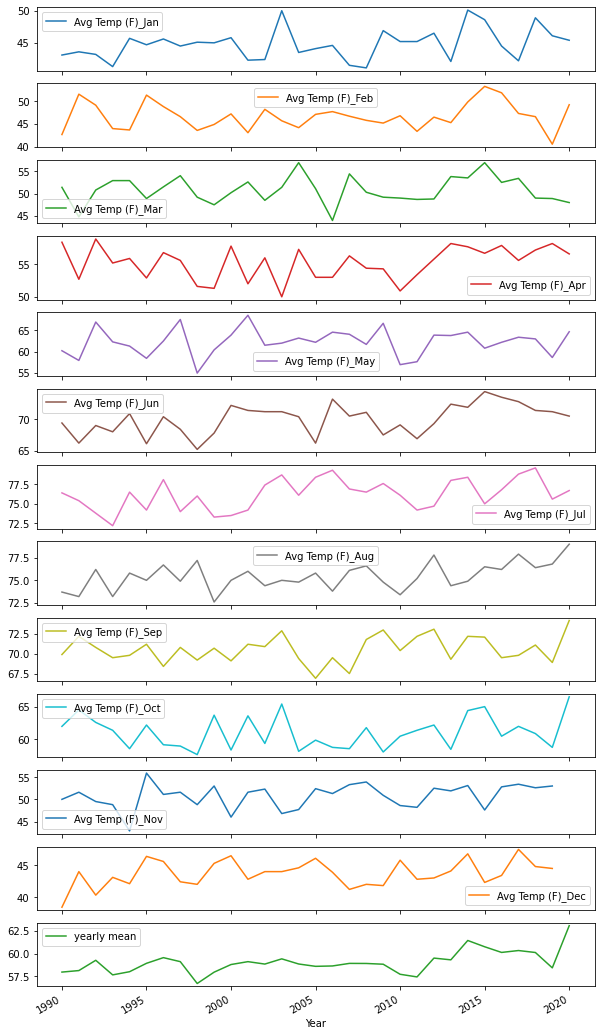

In [14]:
merged_df.plot.line(subplots= True, figsize = (10,20))
plt.show('yearly mean')

The correlation between year and the Yearly Average Temperature is 0.57


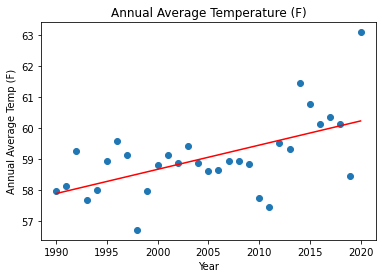

In [26]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("Annual Average Temp (F)") 
plt.title("Annual Average Temperature (F)")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

plt.savefig('EL_annual_avg_temp.png')
# use this in presentation

In [27]:
drought_df = pd.read_csv('Resources/CA_drought.csv')
drought_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [28]:
# # Calculate the correlation coefficient and linear regression model 
# # Calculate the correlation coefficient
# corr_coef = round(st.pearsonr(drought_df['yearly mean'], new_df['yearly mean'])[0],2)

# # # Regression
# slope, intercept, r, p, std_err = st.linregress(drought_df['yearly mean'], new_df['yearly mean'])

# # # Calculate regression equation 
# y = slope * drought_df['yearly mean'] + intercept

# # # Plot the scatter
# plt.scatter(drought_df['yearly mean'], new_df['yearly mean'])
# plt.xlabel("PDSI")
# plt.ylabel("Average Annual Temperature (F)") 
# plt.title("")

# # # Add regression line
# plt.plot(drought_df['yearly mean'], y, "r-")
# print(f'The correlation between PDSI and the Average Annual Temperature is {corr_coef}')

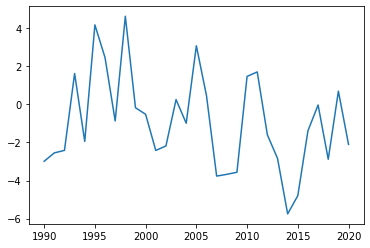

In [29]:
x = drought_df['Year']
y = drought_df['yearly mean']

plt.plot(x, y)

# don't use this for presentation

In [30]:
# Split data into wet and dry season for temperature
# oct-april = wet season
# may-sep = dry season

# t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
temp4 = pd.merge(apr_avg_temp, may_avg_temp,  on= 'Year', how= 'left', suffixes=("_Apr","_May"))
temp5 = pd.merge(temp4, jun_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
temp6 = pd.merge(temp5, jul_avg_temp,  on= 'Year', how= 'left', suffixes=("_Jun","_Jul"))
temp7 = pd.merge(temp6, aug_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
temp8 = pd.merge(temp7, sep_avg_temp,  on= 'Year', how= 'left', suffixes=("_Aug","_Sep"))
temp8.drop(['Month_Apr', 'Month_May', 'Month_Jun', 'Month_Jul', 'Month_Aug', 'Month_Aug', 'Month_Sep'], 1, inplace = True)

In [31]:
temp8.head()
dry_df = temp8

In [32]:
dry_df['dry season mean'] = dry_df.mean(axis=1)
dry_df.head()

,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,dry season mean
Year,,,,,,,
1990,58.4,60.2,69.4,76.4,73.7,69.9,68.000000
1991,52.7,57.9,66.2,75.4,73.2,72.2,66.266667
1992,58.9,67.0,69.0,73.8,76.2,70.8,69.283333
1993,55.2,62.3,68.0,72.2,73.2,69.5,66.733333
1994,55.9,61.3,70.9,76.5,75.8,69.8,68.366667


In [33]:
# Set year as index
dry_seasont = dry_df.reset_index()
dry_seasont.tail()

,Year,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,dry season mean
26,2016,57.9,62.2,73.5,76.8,76.2,69.5,69.350000
27,2017,55.6,63.4,72.8,78.8,77.9,69.8,69.716667
28,2018,57.2,63.0,71.4,79.6,76.4,71.1,69.783333
29,2019,58.2,58.6,71.2,75.6,76.8,68.9,68.216667
30,2020,56.6,64.7,70.5,76.7,79.0,74.2,70.283333


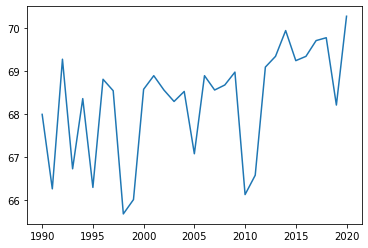

In [34]:
x = dry_seasont['Year']
y = dry_seasont['dry season mean']

plt.plot(x,y)

# don't use this for presentation

The correlation between year and the Yearly Average Temperature is 0.51


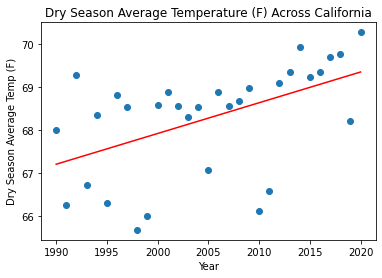

In [37]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(dry_seasont['Year'],dry_seasont['dry season mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(dry_seasont['Year'],dry_seasont['dry season mean'])

# # Calculate regression equation 
y = slope * dry_seasont['Year'] + intercept

# # Plot the scatter
plt.scatter(dry_seasont['Year'],dry_seasont['dry season mean'])
plt.xlabel("Year")
plt.ylabel("Dry Season Average Temp (F)") 
plt.title("Dry Season Average Temperature (F) Across California")

# # Add regression line
plt.plot(dry_seasont['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

plt.savefig('EL_dry_avg_temp.png')
# use this for presentation

In [38]:
drought_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [39]:
dry_season_dr = pd.read_csv('Resources/EL_dry_season_dr')


The correlation between year and the Yearly Average Temperature is -0.7


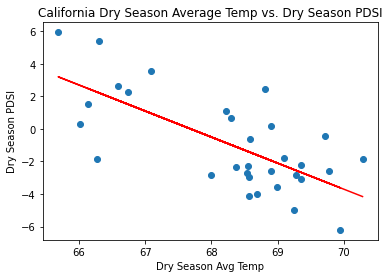

In [40]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(dry_seasont['dry season mean'],dry_season_dr['dry season mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(dry_seasont['dry season mean'],dry_season_dr['dry season mean'])

# # Calculate regression equation 
y = slope * dry_seasont['dry season mean'] + intercept

# # Plot the scatter
plt.scatter(dry_seasont['dry season mean'],dry_season_dr['dry season mean'])
plt.xlabel("Dry Season Avg Temp")
plt.ylabel("Dry Season PDSI") 
plt.title("California Dry Season Average Temp vs. Dry Season PDSI")

# # Add regression line
plt.plot(dry_seasont['dry season mean'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

plt.savefig('EL_dry_temp_pdsi.png')
# use this for presentation

In [39]:
# Split data into wet and dry season for temperature
# oct-april = wet season
# may-sep = dry season

# t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
temp1 = pd.merge(oct_avg_temp, nov_avg_temp,  on= 'Year', how= 'left', suffixes=("_Oct","_Nov"))
temp2 = pd.merge(temp1, dec_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
temp3 = pd.merge(temp2, jan_avg_temp,  on= 'Year', how= 'left', suffixes=("_Dec","_Jan"))
temp4 = pd.merge(temp3, feb_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
temp5 = pd.merge(temp4, mar_avg_temp,  on= 'Year', how= 'left', suffixes=("_Feb","_Mar"))
temp5.drop(['Month_Oct', 'Month_Nov', 'Month_Dec', 'Month_Jan', 'Month_Feb', 'Month_Mar'], 1, inplace = True)

In [41]:
temp_wet = temp5

In [42]:
temp_wet['wet season mean'] = temp_wet.mean(axis=1)
temp_wet.head()

,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,wet season mean
Year,,,,,,,
1990,62.0,50.0,38.4,43.1,42.7,51.4,47.933333
1991,64.5,51.6,44.0,43.6,51.5,44.8,50.000000
1992,62.6,49.5,40.3,43.2,49.1,50.8,49.250000
1993,61.4,48.8,43.1,41.3,44.0,52.9,48.583333
1994,58.6,42.9,42.1,45.7,43.7,52.9,47.650000


In [45]:
# Reset year as index
temp_wet = temp_wet.reset_index()
temp_wet.head()

,index,Year,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,wet season mean
0,0,1990,62.0,50.0,38.4,43.1,42.7,51.4,47.933333
1,1,1991,64.5,51.6,44.0,43.6,51.5,44.8,50.000000
2,2,1992,62.6,49.5,40.3,43.2,49.1,50.8,49.250000
3,3,1993,61.4,48.8,43.1,41.3,44.0,52.9,48.583333
4,4,1994,58.6,42.9,42.1,45.7,43.7,52.9,47.650000


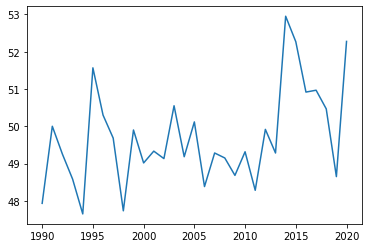

In [46]:
x = temp_wet['Year']
y = temp_wet['wet season mean']

plt.plot(x,y)

The correlation between year and the Yearly Average Temperature is 0.43


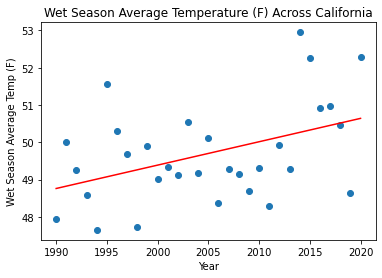

In [48]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(temp_wet['Year'],temp_wet['wet season mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(temp_wet['Year'],temp_wet['wet season mean'])

# # Calculate regression equation 
y = slope * temp_wet['Year'] + intercept

# # Plot the scatter
plt.scatter(temp_wet['Year'],temp_wet['wet season mean'])
plt.xlabel("Year")
plt.ylabel("Wet Season Average Temp (F)") 
plt.title("Wet Season Average Temperature (F) Across California")

# # Add regression line
plt.plot(temp_wet['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')

**Import wet season drought data and plot it against wet season temperatures**

In [51]:
wet_drought = pd.read_csv('Resources/EL_wet_drought.csv')
# wet_drought.head()

,Year,PDSI_Oct,PDSI_Nov,PDSI_Dec,PDSI_Jan,PDSI_Feb,PDSI_Mar,wet season mean
0,1990,-2.71,-3.26,-3.95,-2.47,-2.86,-3.51,-3.126667
1,1991,-1.47,-2.05,-2.43,-5.07,-5.68,-2.65,-3.225000
2,1992,-2.31,-2.93,0.90,-3.22,-2.46,-2.04,-2.010000
3,1993,-0.70,-1.12,-1.53,2.79,3.44,2.90,0.963333
4,1994,-2.45,0.59,0.29,-2.44,-2.26,-2.96,-1.538333


The correlation between year and the Yearly Average Temperature is -0.25


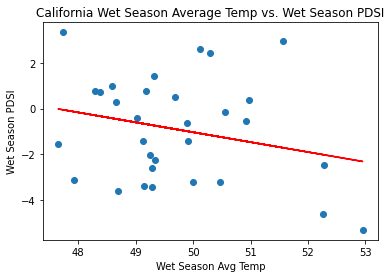

In [56]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(temp_wet['wet season mean'],wet_drought['wet season mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(temp_wet['wet season mean'],wet_drought['wet season mean'])

# # Calculate regression equation 
y = slope * temp_wet['wet season mean'] + intercept

# # Plot the scatter
plt.scatter(temp_wet['wet season mean'],wet_drought['wet season mean'])
plt.xlabel("Wet Season Avg Temp")
plt.ylabel("Wet Season PDSI") 
plt.title("California Wet Season Average Temp vs. Wet Season PDSI")

# # Add regression line
plt.plot(temp_wet['wet season mean'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')